# Dependências

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import os
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Setup

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Carregando & Separando Imagens

In [3]:
imagesTesting = []
labelsTesting = []
imagesTraining = []
labelsTraining = []
classLabels = ['barberry', 'bayberry', 'beach plum', 'bearberry', 'black berry', 'black cherry', 'blueberry', 'ceylon gooseberry', 'chokeberry', 'crowberry']

target_size = (224, 224)


def readTestingImages(i):
    os.chdir('/content/drive/MyDrive/CNN_SOURCE/Testing/Testing')

    for filename in os.listdir():
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read Image
            image = cv2.imread(filename)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            image_resized = cv2.resize(image_rgb, target_size)

            # Normalize the image
            image_normalized = image_resized / 255.0

            if i < 150:
              imagesTesting.append(image_normalized)

            # Extract label from filename
            labels = filename.rsplit("_", 1)
            label = labels[0].replace('_', ' ')

            # Get the index of the label in classLabels
            label_index = classLabels.index(label)

            if i < 150:
              labelsTesting.append(label_index)

            i += 1
            if i == 200:
              i = 0

i = 1
def readTrainingImages(i):
    os.chdir('/content/drive/MyDrive/CNN_SOURCE/Training/Training')

    for filename in os.listdir():
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read Image
            image = cv2.imread(filename)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            image_resized = cv2.resize(image_rgb, target_size)

            # Normalize the image
            image_normalized = image_resized / 255.0

            if i < 50:
              imagesTraining.append(image_normalized)

            # Extract label from filename
            labels = filename.rsplit("_", 1)
            label = labels[0].replace('_', ' ')

            # Get the index of the label in classLabels
            label_index = classLabels.index(label)

            if i < 50:
              labelsTraining.append(label_index)

            i += 1
            if i == 200:
              i = 0

readTestingImages(1)
readTrainingImages(1)

# Preparação dos Conjuntos Treino & Teste

In [4]:
imagesTraining = np.array(imagesTraining).astype('float32')
imagesTesting = np.array(imagesTesting).astype('float32')
imagesTraining /= 255.0
imagesTesting /= 255.0

num_classes = 10

labelsTraining = np.array(labelsTraining)
labelsTraining = to_categorical(labelsTraining, num_classes)
labelsTesting = np.array(labelsTesting)
labelsTesting = to_categorical(labelsTesting, num_classes)

# Arquitetando o Densenet

In [5]:
input_shape = imagesTraining[0].shape

base_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape,
    pooling='avg',
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

29084464/29084464 [==============================] - 0s 0us/step


# Compilando & Treinando Modelo

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(imagesTraining, labelsTraining, epochs=30, validation_data=(imagesTesting, labelsTesting))

Epoch 1/30
16/16 [==============================] - 112s 2s/step - loss: 1.8845 - accuracy: 0.4040 - val_loss: 4.2328 - val_accuracy: 0.1000
Epoch 2/30
16/16 [==============================] - 10s 608ms/step - loss: 1.1229 - accuracy: 0.6460 - val_loss: 4.9363 - val_accuracy: 0.1000
Epoch 3/30
16/16 [==============================] - 10s 677ms/step - loss: 0.6726 - accuracy: 0.7980 - val_loss: 5.3528 - val_accuracy: 0.1000
Epoch 4/30
16/16 [==============================] - 11s 683ms/step - loss: 0.5465 - accuracy: 0.8160 - val_loss: 5.3978 - val_accuracy: 0.1000
Epoch 5/30
16/16 [==============================] - 11s 684ms/step - loss: 0.5860 - accuracy: 0.8260 - val_loss: 3.4320 - val_accuracy: 0.1000
Epoch 6/30
16/16 [==============================] - 10s 642ms/step - loss: 0.6263 - accuracy: 0.8240 - val_loss: 3.0172 - val_accuracy: 0.1000
Epoch 7/30
16/16 [==============================] - 10s 638ms/step - loss: 0.4825 - accuracy: 0.8740 - val_loss: 3.0916 - val_accuracy: 0.1000
E

# Demonstrando resultado do modelo

In [7]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(imagesTesting, labelsTesting)

print('Acurácia final do modelo: %.2f%%' % (test_acc * 100))
print('Perda final do modelo: %.2f%%' % (test_loss * 100))

47/47 [==============================] - 5s 95ms/step - loss: 2.9706 - accuracy: 0.1000
Acurácia final do modelo: 10.00%
Perda final do modelo: 297.06%


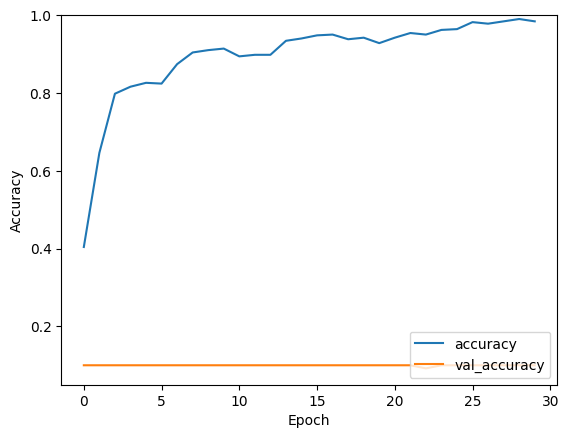

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.05, 1])
plt.legend(loc='lower right')

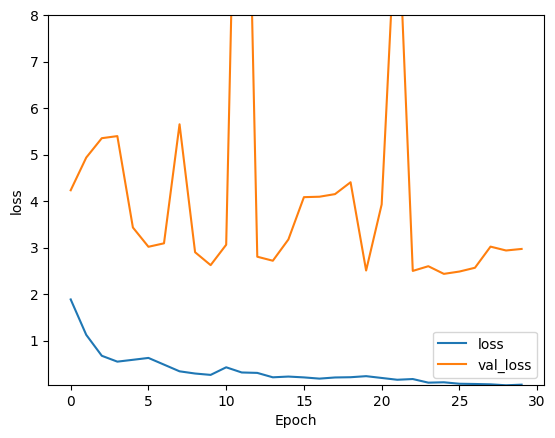

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.05, 8])
plt.legend(loc='lower right')

# Salvando Modelo

In [10]:
# Salvar o modelo
model.save('/content/drive/MyDrive/CNN_SOURCE/Modelos/cnn_modelo_densenet.h5')